# Allison Redfern

# Data analysis project 2:
Applying machine learning methods to movie ratings data

## Mission command preamble: 
As in general, we won’t tell you how to do something. That is up to you and
your creative problem solving skills. However, we will tell you what we would like you to do. One exception:
We do expect you to do this work yourself, so it reflects your intellectual contribution.


## Purpose: 
In this project, you will demonstrate essential machine learning skills. We revisit the same dataset
you already used in project 1. This will highlight what machine learning methods can and cannot do for you,
compared to inferential methods. You also already know the dataset. Please write a report (1-3 pages, as
needed) that answers the questions below. Use figures as needed to make your case.


## Dataset description: 
This dataset features ratings data of 400 movies from 1097 research participants.
1st row: Headers (Movie titles/questions) – note that the indexing in this list is from 1
Row 2-1098: Responses from individual participants
<br><br>Columns 1-400: These columns contain the ratings for the 400 movies (0 to 4, and missing)
<br>Columns 401-420: These columns contain self-assessments on sensation seeking behaviors (1-5)
<br>Columns 421-464: These columns contain responses to personality questions (1-5)
<br>Columns 465-474: These columns contain self-reported movie experience ratings (1-5)
<br>Column 475: Gender identity (1 = female, 2 = male, 3 = self-described)
<br>Column 476: Only child (1 = yes, 0 = no, -1 = no response)
<br>Column 477: Movies are best enjoyed alone (1 = yes, 0 = no, -1 = no response)
<br><br>Note that we did most of the data munging for you already (e.g. Python interprets commas in a csv file as
separators, so we removed all commas from movie titles), but you still need to handle missing data.


## Data handling suggestions: 
To answer the questions properly, you’ll have to do some kind of imputation of
missing ratings (nans). Given the scope of this class, replacing them with a blend (50/50 is ok) of the
arithmetic mean of each column and each row might be most suitable. Don’t get used to this – there are
many problems with this approach. But for now, this is ok - you’ll learn more sophisticated methods later.
But let’s say that the rating of user 350 for movie 200 is missing and that the average rating of this user for
other movies is 4 and the average rating (by other users) for this movie is 3, the to-be-imputed rating would
be 3.5, using this method.


## What we would like you to do: (each question is worth 20% of the grade score):
<br><br>1) For each of the 400 movies, use a simple linear regression model to predict the ratings. Use the ratings
of the *other* 399 movies in the dataset to predict the ratings of each movie (that means you’ll have
to build 399 models for each of the 400 movies). For each of the 400 movies, find the movie that
predicts ratings the best. Then report the average COD of those 400 simple linear regression models.
Please include a histogram of these 400 COD values and a table with the 10 movies that are most
easily predicted from the ratings of a single other movie and the 10 movies that are hardest to predict
from the ratings of a single other movie (and their associated COD values, as well as which movie
ratings are the best predictor, so this table should have 3 columns).
<br><br>2) For the 10 movies that are best and least well predicted from the ratings of a single other movie (so
20 in total), build multiple regression models that include gender identity (column 475), sibship status
(column 476) and social viewing preferences (column 477) as additional predictors (in addition to the
best predicting movie from question 1). Comment on how R^2 has changed relative to the answers
in question 1. Please include a figure with a scatterplot where the old COD (for the simple linear
regression models from the previous question) is on the x-axis and the new R^2 (for the new multiple
regression models) is on the y-axis.
<br><br>3) Pick 30 movies in the middle of the COD range, as identified by question 1 (that were not used in
question 2). Now build a regularized regression model with the ratings from 10 other movies (picked
randomly, or deliberately by you) as an input. Please use ridge regression, and make sure to do
suitable hyperparameter tuning. Also make sure to report the RMSE for each of these 30 movies in a
table, after doing an 80/20 train/test split. Comment on the hyperparameters you use and betas you
find by doing so.
<br><br>4) Repeat question 3) with LASSO regression. Again, make sure to comment on the hyperparameters
you use and betas you find by doing so.
<br><br>5) Compute the average movie enjoyment for each user (using only real, non-imputed data). Use these
averages as the predictor variable X in a logistic regression model. Sort the movies order of increasing
rating (also using only real, non-imputed data). Now pick the 4 movies in the middle of the score range
as your target movie. For each of them, do a media split (now using the imputed data) of ratings to
code movies above the median rating with the Y label 1 (= enjoyed) and movies below the median
with the label 0 (= not enjoyed). For each of these movies, build a logistic regression model (using X
to predict Y), show figures with the outcomes and report the betas as well as the AUC values.
Comment on the quality of your models. Make sure to use cross-validation methods to avoid
overfitting.
<br><br>Extra Credit: Use machine learning methods of your choice to tell us something interesting and true about
the movies in this dataset that is not already covered by the questions above [for an additional 5% of the
grade score].
<br><br>Note: Please answer these questions in accordance with the AFYD guidance that was already
posted for Data Analysis project 1.

In [268]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import statistics as stat
import sys
import random
from sklearn.metrics import r2_score
from sklearn import linear_model
from itertools import permutations
from collections import defaultdict
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, LeaveOneOut, LeavePOut, validation_curve, learning_curve, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, RidgeCV, LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc, roc_curve, roc_auc_score
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import warnings
sns.set()
warnings.filterwarnings("ignore")

data_df = pd.read_csv('movieReplicationSet.csv')
column_headers = data_df.columns.values.tolist()
movies = column_headers[0:400]
data_df = data_df.dropna(axis=0, how='all', subset=movies, inplace=False) #remove rows that are all NaN

display(data_df)

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


In [38]:
# find row and column averages
average_rating_per_user = np.zeros(data_df.shape[0])
average_rating_per_movie = np.zeros(400)
average_rating_per_user_movie = np.zeros((data_df.shape[0],400))

for i in range(data_df.shape[0]):
    average_rating_per_user[i] = np.mean(data_df.iloc[i,0:400])
    
for j in range(400):
    average_rating_per_movie[j] = np.mean(data_df.iloc[:,j])
    
for user in range(data_df.shape[0]):
    for movie in range(400):
        average_rating_per_user_movie[user,movie] = (average_rating_per_user[user]+average_rating_per_movie[movie])/2

In [39]:
# impute averages in new df

data_df_impute = data_df

for x in range(data_df.shape[0]):
    for y in range(400):
        if np.isnan(data_df.iloc[x,y]):
            mean_val = average_rating_per_user_movie[x,y]
            data_df_impute.iloc[x,y] = mean_val

In [40]:
display(data_df_impute)

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,2.447086,2.381992,4.000000,2.725235,3.000000,2.670257,2.554121,2.821232,2.619604,2.827211,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,2.439294,2.374200,1.500000,2.717443,2.752945,2.662464,2.546329,2.813440,2.611812,2.819419,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,2.733065,2.667971,3.234118,3.011214,3.046716,2.956236,2.840100,3.107211,2.905583,3.113190,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,2.282975,2.217880,2.000000,2.561123,3.000000,2.506145,2.390009,2.657120,2.455492,4.000000,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,2.209132,2.144038,3.500000,2.487281,0.500000,2.432303,0.500000,1.000000,2.381650,0.000000,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2.675658,2.610563,3.176711,2.953806,3.500000,2.898828,2.782692,3.049803,2.848175,3.055782,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1093,3.000000,4.000000,3.413546,3.190641,4.000000,4.000000,2.500000,3.286638,3.500000,3.500000,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1094,2.641923,2.576828,3.142976,2.920071,2.955574,2.865093,2.748957,3.500000,2.814440,3.022047,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1095,2.770970,2.705876,3.272023,3.049119,3.084621,2.994141,2.878005,3.145116,2.943488,3.151095,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


## Question 1
For each of the 400 movies, use a simple linear regression model to predict the ratings. Use the ratings of the other 399 movies in the dataset to predict the ratings of each movie (that means you’ll have to build 399 models for each of the 400 movies). For each of the 400 movies, find the movie that predicts ratings the best. Then report the average COD of those 400 simple linear regression models. Please include a histogram of these 400 COD values and a table with the 10 movies that are most easily predicted from the ratings of a single other movie and the 10 movies that are hardest to predict from the ratings of a single other movie (and their associated COD values, as well as which movie ratings are the best predictor, so this table should have 3 columns).

In [13]:
#Linear Regression combinations
#https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d

COD = np.zeros([400,400])
RMSE = np.zeros([400,400])
top_COD = np.zeros(400)
top_COD_movie_predictors = np.zeros(400)

for predictor_movie in range(400):
    for outcome_movie in range(400):
        if  predictor_movie == outcome_movie: # don't want movie to predict itself
            COD[predictor_movie,outcome_movie] = 0
        else: 
            X = data_df_impute.iloc[:, predictor_movie].values.reshape(-1, 1)  
            Y = data_df_impute.iloc[:, outcome_movie].values.reshape(-1, 1)
            linear_regression = LinearRegression()
            linear_regression.fit(X, Y)
            Y_pred = linear_regression.predict(X)
            COD[predictor_movie,outcome_movie] = r2_score(Y, Y_pred)

In [14]:
#find all COD
for i in range(400):            
    top_COD[i] = np.max(COD[:,i])
    top_COD_movie_predictors[i] = np.argmax(COD[:,i])

0.42378171067196035


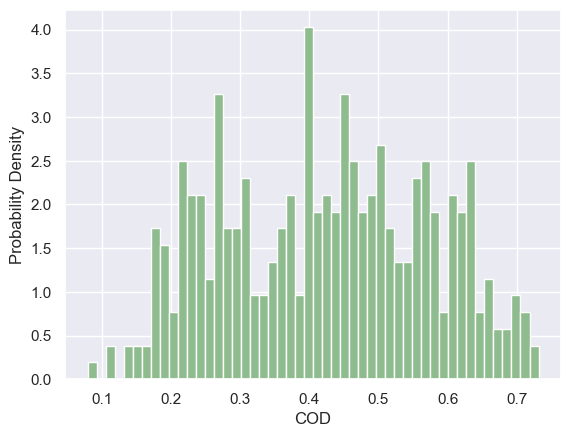

In [15]:
#plot all COD
plt.hist(top_COD, density = True, bins = 50,  color = 'darkseagreen')
plt.xlabel("COD")
plt.ylabel("Probability Density")

print(np.mean(top_COD))

In [16]:
#get top 10 and bottom 10 movies that can be predicted by others and the movies that predict them

top_predicted_COD = np.sort(top_COD)[-10:]
top_predicted_movie = np.argsort(top_COD)[-10:]
top_predicted_movie_predictor = top_COD_movie_predictors[np.argsort(top_COD)[-10:]]
top_predicted_movie_predictor = list(map(int, top_predicted_movie_predictor))  
    
bottom_predicted_COD = np.sort(top_COD)[:10]
bottom_predicted_movie = np.argsort(top_COD)[:10]
bottom_predicted_movie_predictor = top_COD_movie_predictors[np.argsort(top_COD)[:10]] 
bottom_predicted_movie_predictor = list(map(int, bottom_predicted_movie_predictor))

column_names = list(data_df_impute.columns.values)

top_predicted_movie_name = []
top_predicted_movie_predictor_name = []
bottom_predicted_movie_name = []
bottom_predicted_movie_predictor_name = []
column_headers = data_df_impute.columns.values.tolist()

for i in range(10):
    top_predicted_movie_name.append(column_headers[top_predicted_movie[i]])
    top_predicted_movie_predictor_name.append(column_headers[top_predicted_movie_predictor[i]])
    bottom_predicted_movie_name.append(column_headers[bottom_predicted_movie[i]])
    bottom_predicted_movie_predictor_name.append(column_headers[bottom_predicted_movie_predictor[i]])

top_movies_predicted = {'COD': top_predicted_COD, 'Movie': top_predicted_movie_name, 'Predictor Movie': top_predicted_movie_predictor_name}
top_movies_predicted = pd.DataFrame(data=top_movies_predicted)
display(top_movies_predicted)

bottom_movies_predicted = {'COD': bottom_predicted_COD, 'Movie': bottom_predicted_movie_name, 'Predictor Movie': bottom_predicted_movie_predictor_name}
bottom_movies_predicted = pd.DataFrame(data=bottom_movies_predicted)
display(bottom_movies_predicted)

print(top_predicted_movie)
print(top_predicted_movie_predictor)
print(bottom_predicted_movie)
print(bottom_predicted_movie_predictor)


,COD,Movie,Predictor Movie
0,0.692734,Heavy Traffic (1973),Ran (1985)
1,0.700188,The Final Conflict (1981),The Lookout (2007)
2,0.700569,Congo (1995),The Straight Story (1999)
3,0.700569,The Straight Story (1999),Congo (1995)
4,0.711222,The Bandit (1996),Best Laid Plans (1999)
5,0.711222,Best Laid Plans (1999),The Bandit (1996)
6,0.713554,Patton (1970),The Lookout (2007)
7,0.713554,The Lookout (2007),Patton (1970)
8,0.731507,I.Q. (1994),Erik the Viking (1989)
9,0.731507,Erik the Viking (1989),I.Q. (1994)


,COD,Movie,Predictor Movie
0,0.079485,Avatar (2009),Bad Boys (1995)
1,0.111343,Interstellar (2014),Torque (2004)
2,0.117080,Black Swan (2010),Sorority Boys (2002)
3,0.141426,Clueless (1995),Escape from LA (1996)
4,0.143887,The Cabin in the Woods (2012),The Evil Dead (1981)
5,0.148514,La La Land (2016),The Lookout (2007)
6,0.154136,Titanic (1997),Cocktail (1988)
7,0.160164,13 Going on 30 (2004),Can't Hardly Wait (1998)
8,0.168991,The Fast and the Furious (2001),Terminator 3: Rise of the Machines (2003)
9,0.171119,Grown Ups 2 (2013),The Core (2003)


[309 334 282 287 240 249 395 377 208 203]
[300, 377, 287, 282, 249, 240, 377, 395, 203, 208]
[ 80  95   9  55 190 319 292  41  14 248]
[226, 64, 42, 116, 167, 377, 356, 155, 18, 263]


## Question 2
For the 10 movies that are best and least well predicted from the ratings of a single other movie (so 20 in total), build multiple regression models that include gender identity (column 475), sibship status (column 476) and social viewing preferences (column 477) as additional predictors (in addition to the best predicting movie from question 1). Comment on how R^2 has changed relative to the answers in question 1. Please include a figure with a scatterplot where the old COD (for the simple linear regression models from the previous question) is on the x-axis and the new R^2 (for the new multiple regression models) is on the y-axis.

In [17]:
data_df_impute2 = data_df_impute #new dataset for question 2

# Build out dummy columns for gender:  
gender = data_df_impute2.iloc[:,474]
gender = pd.get_dummies(gender)
gender = gender.rename(columns={1.0: "Female", 2.0:"Male", 3.0: "Self-Described Gender"})
data_df_impute2 = pd.concat([data_df_impute2,gender], axis=1) #add new dummy columns to dataframe
data_df_impute2 = data_df_impute2.dropna(axis=0, subset = 'Gender identity (1 = female; 2 = male; 3 = self-described)', inplace=False) #remove rows that are all NaN    
data_df_impute2.drop(['Self-Described Gender', 'Gender identity (1 = female; 2 = male; 3 = self-described)'], axis = 1,inplace = True) #remove columns that will not be used in analysis


# Remove did not responds for only child:  
data_df_impute2.drop(data_df_impute2[data_df_impute2['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'] == -1].index, axis = 0, inplace = True)


# Remove did not responds for Watching Alone: 
data_df_impute2.drop(data_df_impute2[data_df_impute2['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == -1].index, axis = 0, inplace = True)
display(data_df_impute2)




,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond),Female,Male
0,2.447086,2.381992,4.000000,2.725235,3.000000,2.670257,2.554121,2.821232,2.619604,2.827211,...,6.0,2.0,5.0,5.0,5.0,1.0,0,1,1,0
1,2.439294,2.374200,1.500000,2.717443,2.752945,2.662464,2.546329,2.813440,2.611812,2.819419,...,1.0,1.0,6.0,5.0,3.0,2.0,0,0,1,0
2,2.733065,2.667971,3.234118,3.011214,3.046716,2.956236,2.840100,3.107211,2.905583,3.113190,...,4.0,3.0,5.0,5.0,4.0,4.0,1,0,1,0
3,2.282975,2.217880,2.000000,2.561123,3.000000,2.506145,2.390009,2.657120,2.455492,4.000000,...,1.0,1.0,4.0,5.0,3.0,1.0,0,1,1,0
4,2.209132,2.144038,3.500000,2.487281,0.500000,2.432303,0.500000,1.000000,2.381650,0.000000,...,3.0,2.0,5.0,6.0,4.0,4.0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2.675658,2.610563,3.176711,2.953806,3.500000,2.898828,2.782692,3.049803,2.848175,3.055782,...,4.0,3.0,5.0,5.0,4.0,4.0,0,0,1,0
1093,3.000000,4.000000,3.413546,3.190641,4.000000,4.000000,2.500000,3.286638,3.500000,3.500000,...,3.0,5.0,5.0,5.0,6.0,5.0,0,0,1,0
1094,2.641923,2.576828,3.142976,2.920071,2.955574,2.865093,2.748957,3.500000,2.814440,3.022047,...,3.0,1.0,6.0,6.0,4.0,2.0,0,0,1,0
1095,2.770970,2.705876,3.272023,3.049119,3.084621,2.994141,2.878005,3.145116,2.943488,3.151095,...,1.0,1.0,4.0,3.0,3.0,1.0,0,1,1,0


In [18]:
# Multiple Linear Regression

top_COD_multiple = np.zeros(10)
bottom_COD_multiple = np.zeros(10)

# Top:
print("Top Movies:")
for movie_index in range(10):
    # combine outcome + 4 predictors:
    combined_X_Y_multiple = pd.concat([
        data_df_impute2.iloc[:,top_predicted_movie[movie_index]],
        data_df_impute2.iloc[:,top_predicted_movie_predictor[movie_index]],
        data_df_impute2.iloc[:,-4:]], axis=1)
    
    # break into predictors and outcome:
    X_multiple = combined_X_Y_multiple.values[:,1:]
    Y_multiple = combined_X_Y_multiple.values[:,0]
    
    #multiple linear regression:
    multiple_linear_regression = LinearRegression()
    multiple_linear_regression.fit(X_multiple, Y_multiple)
    Y_pred_multiple = multiple_linear_regression.predict(X_multiple)
    top_COD_multiple[movie_index] = r2_score(Y_multiple, Y_pred_multiple)
    print(top_predicted_movie_name[movie_index], "coefficients:")
    print(multiple_linear_regression.coef_)
    print(" ")

# Bottom:
print("Bottom Movies:")
for movie_index in range(10):
    # combine outcome + 4 predictors:
    combined_X_Y_multiple = pd.concat([
        data_df_impute2.iloc[:,bottom_predicted_movie[movie_index]],
        data_df_impute2.iloc[:,bottom_predicted_movie_predictor[movie_index]],
        data_df_impute2.iloc[:,-4:]], axis=1)
        
    # break into predictors and outcome:
    X_multiple = combined_X_Y_multiple.values[:,1:]
    Y_multiple = combined_X_Y_multiple.values[:,0]
    
    #multiple linear regression:
    multiple_linear_regression = LinearRegression()
    multiple_linear_regression.fit(X_multiple, Y_multiple)
    Y_pred_multiple = multiple_linear_regression.predict(X_multiple)
    bottom_COD_multiple[movie_index] = r2_score(Y_multiple, Y_pred_multiple)
    print(bottom_predicted_movie_name[movie_index], "coefficients:")
    print(multiple_linear_regression.coef_)
    print(" ")



Top Movies:
Heavy Traffic (1973) coefficients:
[ 0.75448938 -0.0121266  -0.00765056  0.04186473  0.02920685]
 
The Final Conflict (1981) coefficients:
[ 0.83138458 -0.04030745  0.00750859  0.03183498  0.03738139]
 
Congo (1995) coefficients:
[0.85543461 0.00090698 0.00707206 0.01854243 0.02241353]
 
The Straight Story (1999) coefficients:
[ 0.81487809 -0.01773253 -0.01430472  0.04005502  0.02364987]
 
The Bandit (1996) coefficients:
[ 0.8011573  -0.01587746  0.00385937  0.04268077  0.01973759]
 
Best Laid Plans (1999) coefficients:
[ 0.89039835  0.00742034 -0.01676766  0.01047067  0.02966103]
 
Patton (1970) coefficients:
[ 8.75472042e-01 -8.18611666e-04  2.43597655e-02  2.41808737e-02
  2.22803085e-02]
 
The Lookout (2007) coefficients:
[ 0.81117548 -0.01458259 -0.02933098  0.03045464  0.03124617]
 
I.Q. (1994) coefficients:
[0.87816923 0.01079591 0.01158782 0.0195777  0.02985846]
 
Erik the Viking (1989) coefficients:
[ 0.83079409 -0.02665488 -0.01794219  0.03078251  0.01462778]
 
Bo

Old COD: [0.69273352 0.70018812 0.70056898 0.70056898 0.71122225 0.71122225
 0.71355426 0.71355426 0.73150748 0.73150748 0.07948469 0.1113426
 0.11708034 0.14142644 0.14388687 0.14851373 0.15413567 0.16016373
 0.16899142 0.17111919]
New COD: [0.69004136 0.69856143 0.69873861 0.69976559 0.71524838 0.71517931
 0.71129873 0.71228256 0.73066133 0.73187494 0.08506535 0.11903134
 0.11176864 0.14902366 0.15285838 0.15288212 0.16070676 0.16272268
 0.17511481 0.17802321]
Difference: [-0.00269216 -0.00162669 -0.00183037 -0.00080339  0.00402613  0.00395706
 -0.00225553 -0.0012717  -0.00084615  0.00036746  0.00558066  0.00768874
 -0.0053117   0.00759722  0.00897151  0.00436839  0.00657109  0.00255895
  0.00612339  0.00690402]


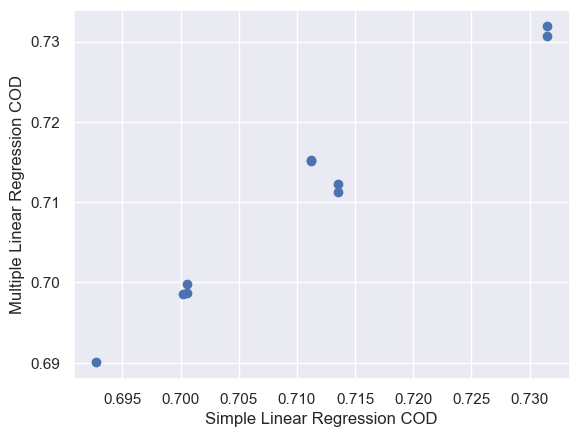

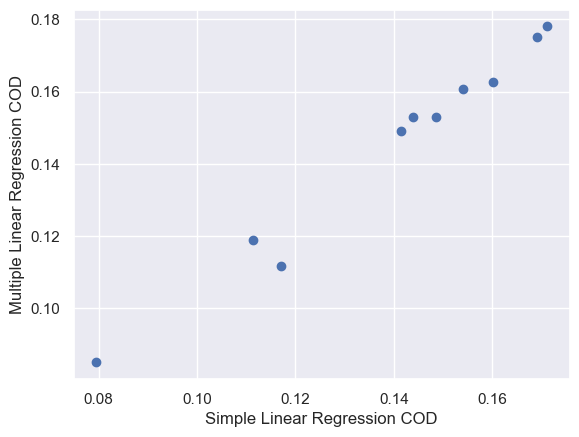

In [231]:
old_COD = np.append(top_predicted_COD, bottom_predicted_COD)
new_COD = np.append(top_COD_multiple, bottom_COD_multiple)

print("Old COD:", old_COD)
print("New COD:", new_COD)
print("Difference:", new_COD - old_COD)

plt.plot(top_predicted_COD, top_COD_multiple, 'o')
plt.xlabel('Simple Linear Regression COD')
plt.ylabel('Multiple Linear Regression COD')
plt.show()
plt.plot(bottom_predicted_COD, bottom_COD_multiple, 'o')
plt.xlabel('Simple Linear Regression COD')
plt.ylabel('Multiple Linear Regression COD')
plt.show()

## Question 3
Pick 30 movies in the middle of the COD range, as identified by question 1 (that were not used in question 2). Now build a regularized regression model with the ratings from 10 other movies (picked randomly, or deliberately by you) as an input. Please use ridge regression, and make sure to do suitable hyperparameter tuning. Also make sure to report the RMSE for each of these 30 movies in a table, after doing an 80/20 train/test split. Comment on the hyperparameters you use and betas you find by doing so.

In [246]:
non_top_bottom_movies_index = np.argsort(top_COD)[185:215]
input_movie_sample_index = np.argsort(top_COD)[216:226]
non_top_bottom_movies_index
middle_movie_sample = data_df_impute.iloc[:,non_top_bottom_movies_index]

input_movie_sample = data_df_impute.iloc[:,input_movie_sample_index]


X = np.array(input_movie_sample)
Y = np.array(middle_movie_sample)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 5)


print(middle_movie_sample.columns.values.tolist())
print(input_movie_sample.columns.values.tolist())


['Gone in Sixty Seconds (2000)', 'Crossroads (2002)', 'Austin Powers: The Spy Who Shagged Me (1999)', 'Austin Powers in Goldmember (2002)', 'Goodfellas (1990)', 'The Big Lebowski (1998)', 'Twister (1996)', 'Blues Brothers 2000 (1998)', 'Dances with Wolves (1990)', '28 Days Later (2002)', 'Knight and Day (2010)', 'The Evil Dead (1981)', 'The Machinist (2004)', 'The Blue Lagoon (1980)', 'Uptown Girls (2003)', 'Men in Black II (2002)', 'Men in Black (1997)', 'The Green Mile (1999)', 'The Rock (1996)', "You're Next (2011)", 'The Poseidon Adventure (1972)', 'The Good the Bad and the Ugly (1966)', 'Let the Right One In (2008)', 'Equilibrium (2002)', 'Just Married (2003)', 'The Mummy Returns (2001)', 'The Mummy (1999)', 'Reservoir Dogs (1992)', 'Man on Fire (2004)', 'The Prestige (2006)']
["There's Something About Mary (1998)", 'Predator (1987)', 'Toy Story (1995)', 'Shrek 2 (2004)', 'Shrek (2001)', 'Just Like Heaven (2005)', 'Stand By Me (1986)', "My Best Friend's Wedding (1997)", 'Showgirls

In [261]:
# Ridge Regression with Hyperparameter Tuning (one alpha for each of the 30 movies)

alphas1=[2.0**c for c in np.arange(-5,5)]
alphas2 = np.linspace(33,200)
alphas = [*alphas1, *alphas2]
RMSE = np.zeros([30,len(alphas)])
optimal_alpha = np.zeros(30)
top_RMSE = np.zeros(30)

print(middle_movie_sample.columns.values.tolist())
print('alphas tested:', alphas)
for i, movie in enumerate(middle_movie_sample):
    for x, alpha in enumerate(alphas):
        ridge_cv = RidgeCV(alphas=alphas).fit(X_train, y_train[:,i])
        optimal_alpha[i] = ridge_cv.alpha_
#     print(optimal_alpha[i])

    
for i, movie in enumerate(middle_movie_sample):
    ridge_reg = Ridge(alpha = optimal_alpha[i])
    ridge_reg.fit(X_train, y_train[:,i])
    y_pred = ridge_reg.predict(X_test)
    top_RMSE[i] = mean_squared_error(y_pred, y_test[:,i])
    print(middle_movie_sample.columns.values.tolist()[i],"Model Coef: ", ridge_reg.coef_)
#     print(top_RMSE[i])
    print(middle_movie_sample.columns.values.tolist()[i],",", optimal_alpha[i],",", top_RMSE[i])
print(top_RMSE)


['Gone in Sixty Seconds (2000)', 'Crossroads (2002)', 'Austin Powers: The Spy Who Shagged Me (1999)', 'Austin Powers in Goldmember (2002)', 'Goodfellas (1990)', 'The Big Lebowski (1998)', 'Twister (1996)', 'Blues Brothers 2000 (1998)', 'Dances with Wolves (1990)', '28 Days Later (2002)', 'Knight and Day (2010)', 'The Evil Dead (1981)', 'The Machinist (2004)', 'The Blue Lagoon (1980)', 'Uptown Girls (2003)', 'Men in Black II (2002)', 'Men in Black (1997)', 'The Green Mile (1999)', 'The Rock (1996)', "You're Next (2011)", 'The Poseidon Adventure (1972)', 'The Good the Bad and the Ugly (1966)', 'Let the Right One In (2008)', 'Equilibrium (2002)', 'Just Married (2003)', 'The Mummy Returns (2001)', 'The Mummy (1999)', 'Reservoir Dogs (1992)', 'Man on Fire (2004)', 'The Prestige (2006)']
alphas tested: [0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 33.0, 36.40816326530612, 39.816326530612244, 43.224489795918366, 46.63265306122449, 50.04081632653062, 53.44897959183673, 56.85714

In [262]:
# # Ridge Regression with Hyperparameter Tuning (one alpha for each of the 30 movies - old version)

# alphas1=[2.0**c for c in np.arange(-30,5)]
# alphas2 = np.linspace(33,300)
# alphas = [*alphas1, *alphas2]
# RMSE = np.zeros([30,len(alphas)])
# optimal_alpha = np.zeros(30)
# top_RMSE = np.zeros(30)

# print('alphas tested:', alphas)

# for i, movie in enumerate(middle_movie_sample):
#     for x, alpha in enumerate(alphas):  
#         ridge_reg = Ridge(alpha = alpha)
#         ridge_reg.fit(X_train, y_train[:,i])
#         y_pred = ridge_reg.predict(X_test)
#         RMSE[i,x] = mean_squared_error(y_pred, y_test[:,i])
# #     plt.plot(alphas,RMSE[i,:])
# #     plt.show()
#     optimal_alpha[i] = alphas[np.argmin(RMSE[i,:])]
    
# for i, movie in enumerate(middle_movie_sample):
#     ridge_reg = Ridge(alpha = optimal_alpha[i])
#     ridge_reg.fit(X_train, y_train[:,i])
#     y_pred = ridge_reg.predict(X_test)
#     top_RMSE[i] = mean_squared_error(y_pred, y_test[:,i])
# #     print(middle_movie_sample.columns.values.tolist()[i],"Model Coef: ", ridge_reg.coef_)
# #     print(middle_movie_sample.columns.values.tolist()[i],",", optimal_alpha[i],",", top_RMSE[i])
# # print(top_RMSE)


alphas tested: [9.313225746154785e-10, 1.862645149230957e-09, 3.725290298461914e-09, 7.450580596923828e-09, 1.4901161193847656e-08, 2.9802322387695312e-08, 5.960464477539063e-08, 1.1920928955078125e-07, 2.384185791015625e-07, 4.76837158203125e-07, 9.5367431640625e-07, 1.9073486328125e-06, 3.814697265625e-06, 7.62939453125e-06, 1.52587890625e-05, 3.0517578125e-05, 6.103515625e-05, 0.0001220703125, 0.000244140625, 0.00048828125, 0.0009765625, 0.001953125, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 33.0, 38.44897959183673, 43.89795918367347, 49.3469387755102, 54.79591836734694, 60.244897959183675, 65.6938775510204, 71.14285714285714, 76.59183673469389, 82.0408163265306, 87.48979591836735, 92.93877551020408, 98.38775510204081, 103.83673469387755, 109.28571428571429, 114.73469387755102, 120.18367346938776, 125.63265306122449, 131.0816326530612, 136.53061224489795, 141.9795918367347, 147.42857142857144, 152.87755102040816, 158.32653061224488

alphas tested: [90.         90.05050505 90.1010101  90.15151515 90.2020202  90.25252525
 90.3030303  90.35353535 90.4040404  90.45454545 90.50505051 90.55555556
 90.60606061 90.65656566 90.70707071 90.75757576 90.80808081 90.85858586
 90.90909091 90.95959596 91.01010101 91.06060606 91.11111111 91.16161616
 91.21212121 91.26262626 91.31313131 91.36363636 91.41414141 91.46464646
 91.51515152 91.56565657 91.61616162 91.66666667 91.71717172 91.76767677
 91.81818182 91.86868687 91.91919192 91.96969697 92.02020202 92.07070707
 92.12121212 92.17171717 92.22222222 92.27272727 92.32323232 92.37373737
 92.42424242 92.47474747 92.52525253 92.57575758 92.62626263 92.67676768
 92.72727273 92.77777778 92.82828283 92.87878788 92.92929293 92.97979798
 93.03030303 93.08080808 93.13131313 93.18181818 93.23232323 93.28282828
 93.33333333 93.38383838 93.43434343 93.48484848 93.53535354 93.58585859
 93.63636364 93.68686869 93.73737374 93.78787879 93.83838384 93.88888889
 93.93939394 93.98989899 94.04040404

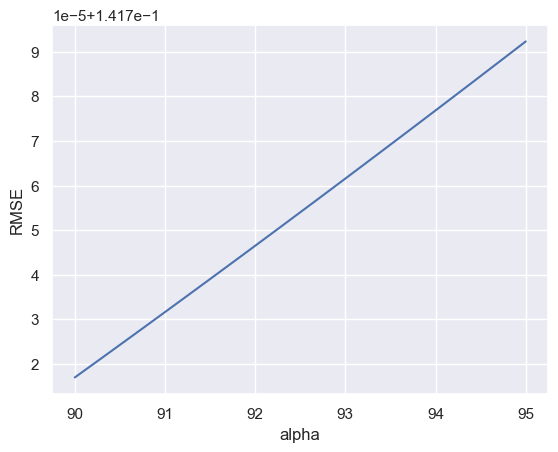

In [263]:
# ridge_reg Regression with Hyperparameter Tuning (one alpha for all movies)

# #alphas=[2.0**c for c in np.arange(-5, 10,0.5)]
# alphas = np.linspace(90,95,100)
# RMSE = np.zeros(30)
# avg_RMSE = np.zeros(len(alphas))

# for x, alpha in enumerate(alphas):  
#     ridge_reg = Ridge(alpha = alpha)
#     for i, movie in enumerate(middle_movie_sample):
#         ridge_reg.fit(X_train, y_train[:,i])
#         y_pred = ridge_reg.predict(X_test)
#         RMSE[i] = mean_squared_error(y_pred, y_test[:,i])
#     avg_RMSE[x] = RMSE.mean()
    
# plt.plot(alphas, avg_RMSE)
# plt.xlabel("alpha")
# plt.ylabel("RMSE")
# print('alphas tested:', alphas)
# print('average RMSE for alpha:', avg_RMSE)
# optimal_alpha = alphas[np.argmin(avg_RMSE)]
# print('optimal alpha:', optimal_alpha)

# for i, movie in enumerate(middle_movie_sample):
#     ridge_reg = Ridge(alpha = optimal_alpha)
#     ridge_reg.fit(X_train, y_train[:,i])
#     y_pred = ridge_reg.predict(X_test)
#     RMSE[i] = mean_squared_error(y_pred, y_test[:,i])
#     print(middle_movie_sample.columns.values.tolist()[i],"Model Coef: ", ridge_reg.coef_)
# print('RMSE:', RMSE)



In [264]:
# for i, movie in enumerate(middle_movie_sample):
#     ridge_reg = Ridge(alpha = optimal_alpha[i])
#     ridge_reg.fit(X_train, y_train[:,i])
#     y_pred = ridge_reg.predict(X_test)
#     plt.plot(y_test[:,i], y_pred, 'o')
#     plt.show()

## Question 4
Repeat question 3) with LASSO regression. Again, make sure to comment on the hyperparameters you use and betas you find by doing so.

In [280]:
# Lasso Regression with Hyperparameter Tuning (one alpha for each of the 30 movies)
alphas1=[2.0**c for c in np.arange(-25,1)]
alphas2 = np.linspace(0.0001,0.01)
alphas = [*alphas1, *alphas2]
RMSE = np.zeros([30,len(alphas)])
optimal_alpha = np.zeros(30)
top_RMSE = np.zeros(30)

print('alphas tested:', alphas)

for i, movie in enumerate(middle_movie_sample):
    for x, alpha in enumerate(alphas):
        lasso_cv = LassoCV(alphas=alphas).fit(X_train, y_train[:,i])
        optimal_alpha[i] = lasso_cv.alpha_
#     print(optimal_alpha[i])

for i, movie in enumerate(middle_movie_sample):
    lasso_reg = Lasso(alpha = optimal_alpha[i])
    lasso_reg.fit(X_train, y_train[:,i])
    y_pred = lasso_reg.predict(X_test)
    top_RMSE[i] = mean_squared_error(y_pred, y_test[:,i])
    print(middle_movie_sample.columns.values.tolist()[i],"Model Coef: ", lasso_reg.coef_)
#     print(top_RMSE[i])
    print(middle_movie_sample.columns.values.tolist()[i],",", optimal_alpha[i],",",top_RMSE[i])
print(top_RMSE)

alphas tested: [2.9802322387695312e-08, 5.960464477539063e-08, 1.1920928955078125e-07, 2.384185791015625e-07, 4.76837158203125e-07, 9.5367431640625e-07, 1.9073486328125e-06, 3.814697265625e-06, 7.62939453125e-06, 1.52587890625e-05, 3.0517578125e-05, 6.103515625e-05, 0.0001220703125, 0.000244140625, 0.00048828125, 0.0009765625, 0.001953125, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 0.0001, 0.0003020408163265306, 0.0005040816326530613, 0.000706122448979592, 0.0009081632653061226, 0.0011102040816326532, 0.001312244897959184, 0.0015142857142857145, 0.0017163265306122451, 0.0019183673469387757, 0.002120408163265306, 0.002322448979591837, 0.0025244897959183677, 0.002726530612244898, 0.002928571428571429, 0.003130612244897959, 0.00333265306122449, 0.0035346938775510208, 0.003736734693877551, 0.003938775510204082, 0.004140816326530613, 0.004342857142857144, 0.004544897959183674, 0.004746938775510205, 0.004948979591836736, 0.005151020408163266, 0.00535306122448979

In [274]:
# Lasso Regression with Hyperparameter Tuning (one alpha for each of the 30 movies - old way)

# alphas=[2.0**c for c in np.arange(-45,1)]
# RMSE = np.zeros([30,len(alphas)])
# optimal_alpha = np.zeros(30)
# top_RMSE = np.zeros(30)

# print('alphas tested:', alphas)

# for i, movie in enumerate(middle_movie_sample):
#     for x, alpha in enumerate(alphas):  
#         lasso_reg = Lasso(alpha = alpha)
#         lasso_reg.fit(X_train, y_train[:,i])
#         y_pred = lasso_reg.predict(X_test)
#         RMSE[i,x] = mean_squared_error(y_pred, y_test[:,i])
# #     plt.plot(alphas,RMSE[i,:])
# #     plt.show()
#     optimal_alpha[i] = alphas[np.argmin(RMSE[i,:])]
# #     print(optimal_alpha[i])

# for i, movie in enumerate(middle_movie_sample):
#     lasso_reg = Lasso(alpha = optimal_alpha[i])
#     lasso_reg.fit(X_train, y_train[:,i])
#     y_pred = lasso_reg.predict(X_test)
#     top_RMSE[i] = mean_squared_error(y_pred, y_test[:,i])
#     print(middle_movie_sample.columns.values.tolist()[i],"Model Coef: ", lasso_reg.coef_)
# #     print(top_RMSE[i])
#     print(middle_movie_sample.columns.values.tolist()[i],",", optimal_alpha[i],",",top_RMSE[i])
# print(top_RMSE)

alphas tested: [2.842170943040401e-14, 5.684341886080802e-14, 1.1368683772161603e-13, 2.2737367544323206e-13, 4.547473508864641e-13, 9.094947017729282e-13, 1.8189894035458565e-12, 3.637978807091713e-12, 7.275957614183426e-12, 1.4551915228366852e-11, 2.9103830456733704e-11, 5.820766091346741e-11, 1.1641532182693481e-10, 2.3283064365386963e-10, 4.656612873077393e-10, 9.313225746154785e-10, 1.862645149230957e-09, 3.725290298461914e-09, 7.450580596923828e-09, 1.4901161193847656e-08, 2.9802322387695312e-08, 5.960464477539063e-08, 1.1920928955078125e-07, 2.384185791015625e-07, 4.76837158203125e-07, 9.5367431640625e-07, 1.9073486328125e-06, 3.814697265625e-06, 7.62939453125e-06, 1.52587890625e-05, 3.0517578125e-05, 6.103515625e-05, 0.0001220703125, 0.000244140625, 0.00048828125, 0.0009765625, 0.001953125, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0]
Gone in Sixty Seconds (2000) Model Coef:  [0.1630736  0.08060354 0.03808154 0.00558913 0.         0.13654593
 0.01027

alphas tested: [0.0009765625, 0.0013810679320049757, 0.001953125, 0.0027621358640099515, 0.00390625, 0.005524271728019903, 0.0078125, 0.011048543456039806, 0.015625, 0.02209708691207961]
average RMSE for alpha: [0.14233323 0.14231286 0.14230227 0.14232422 0.14239918 0.14253659
 0.14277461 0.14321381 0.14408153 0.14577273]
optimal alpha: 0.001953125
Gone in Sixty Seconds (2000) Model Coef:  [ 0.17702085  0.10934859  0.03827364  0.00885644  0.          0.15540441
  0.02749289  0.00048294  0.29786146 -0.        ]
Crossroads (2002) Model Coef:  [ 0.16752033  0.01355875  0.01568161  0.03197259  0.01069886  0.17581184
  0.17320836 -0.00583003  0.20717009  0.04591847]
Austin Powers: The Spy Who Shagged Me (1999) Model Coef:  [0.21880288 0.00916125 0.04496109 0.03461986 0.04883939 0.09234699
 0.22657028 0.09621521 0.17706431 0.11913884]
Austin Powers in Goldmember (2002) Model Coef:  [0.28720692 0.15178812 0.00112718 0.00237751 0.07246497 0.06986531
 0.02343223 0.22607112 0.00445039 0.11818121

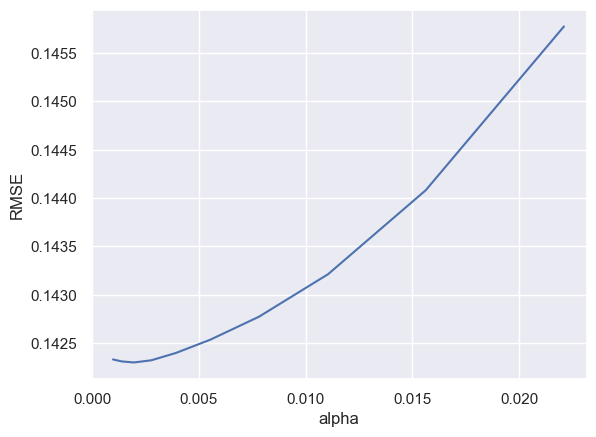

In [271]:
# Lasso Regression with Hyperparameter Tuning (one alpha for all movies)

# alphas=[2.0**c for c in np.arange(-10, -5,0.5)]
# RMSE = np.zeros(30)
# avg_RMSE = np.zeros(len(alphas))

# for x, alpha in enumerate(alphas):  
#     lasso_reg = Lasso(alpha = alpha)
#     for i, movie in enumerate(middle_movie_sample):
#         lasso_reg.fit(X_train, y_train[:,i])
#         y_pred = lasso_reg.predict(X_test)
#         RMSE[i] = mean_squared_error(y_pred, y_test[:,i])
#     avg_RMSE[x] = RMSE.mean()
    
# plt.plot(alphas, avg_RMSE)
# plt.xlabel("alpha")
# plt.ylabel("RMSE")
# print('alphas tested:', alphas)
# print('average RMSE for alpha:', avg_RMSE)
# optimal_alpha = alphas[np.argmin(avg_RMSE)]
# print('optimal alpha:', optimal_alpha)

# for i, movie in enumerate(middle_movie_sample):
#     lasso_reg = Lasso(alpha = optimal_alpha)
#     lasso_reg.fit(X_train, y_train[:,i])
#     y_pred = lasso_reg.predict(X_test)
#     RMSE[i] = mean_squared_error(y_pred, y_test[:,i])
#     coef = lasso_reg.coef_
#     print(middle_movie_sample.columns.values.tolist()[i],"Model Coef: ", coef)
# print('RMSE:', RMSE)


## Question 5
Compute the average movie enjoyment for each user (using only real, non-imputed data). Use these averages as the predictor variable X in a logistic regression model. Sort the movies order of increasing rating (also using only real, non-imputed data). Now pick the 4 movies in the middle of the score range as your target movie. For each of them, do a media split (now using the imputed data) of ratings to code movies above the median rating with the Y label 1 (= enjoyed) and movies below the median with the label 0 (= not enjoyed). For each of these movies, build a logistic regression model (using X to predict Y), show figures with the outcomes and report the betas as well as the AUC values. Comment on the quality of your models. Make sure to use cross-validation methods to avoid overfitting.

In [49]:
data_df = pd.read_csv('movieReplicationSet.csv')
column_headers = data_df.columns.values.tolist()
movies = column_headers[0:400]
data_df = data_df.dropna(axis=0, how='all', subset=movies, inplace=False) #remove rows that are all NaN

# find row and column averages

average_rating_per_user = np.zeros(data_df.shape[0])
average_rating_per_movie = np.zeros(400)
average_rating_per_user_movie = np.zeros((data_df.shape[0],400))

for i in range(data_df.shape[0]):
    average_rating_per_user[i] = np.mean(data_df.iloc[i,0:400])
    
for j in range(400):
    average_rating_per_movie[j] = np.mean(data_df.iloc[:,j])


In [50]:
movies = data_df.columns.values.tolist()
movies = column_headers[0:400]
movies = pd.DataFrame(movies, columns = ['movies'])
average_ratings = pd.DataFrame (average_rating_per_movie, columns = ['average_rating'])
average_ratings = pd.concat([movies,average_ratings], axis=1) 
average_ratings = average_ratings.sort_values('average_rating').reset_index()
median = np.median(average_rating_per_movie)
print(median)

display(average_ratings)

2.5819229982615806


,index,movies,average_rating
0,27,3000 Miles to Graceland (2001),1.915584
1,36,North (1994),1.929487
2,119,Barb Wire (1996),1.966667
3,194,Battlefield Earth (2000),2.006757
4,187,In America (2002),2.006944
...,...,...,...
395,58,Good Will Hunting (1997),3.362403
396,214,The Shawshank Redemption (1994),3.378827
397,138,Finding Nemo (2003),3.388067
398,264,Spirited Away (2001),3.414207


In [51]:
movie_sample_df = average_ratings.iloc[198:202,:]
movie_sample_list = np.array(movie_sample_df['movies'])
movie_sample_data = data_df_impute[movie_sample_list]

movie_sample_enjoyment = np.zeros([movie_sample_data.shape[0],movie_sample_data.shape[1]])

display(movie_sample_df)

,index,movies,average_rating
198,251,Fahrenheit 9/11 (2004),2.578014
199,183,Happy Gilmore (1996),2.581169
200,61,Diamonds are Forever (1971),2.582677
201,166,Scream (1996),2.584270


In [52]:
for j in range(movie_sample_enjoyment.shape[1]):
    median = np.median(movie_sample_data.iloc[:,j])
    print(median)
    for i in range(movie_sample_enjoyment.shape[0]):
        if movie_sample_data.iloc[i,j] >= median: 
            movie_sample_enjoyment[i,j] = 1
        else:
            movie_sample_enjoyment[i,j] = 0
movie_sample_enjoyment = movie_sample_enjoyment.astype('int')

2.798028267652341
2.8083158039143954
2.7993872369214716
2.816787609238452


Fahrenheit 9/11 (2004)
Area under ROC curve: 0.9688328912466843
Beta: [[7.21410892]]


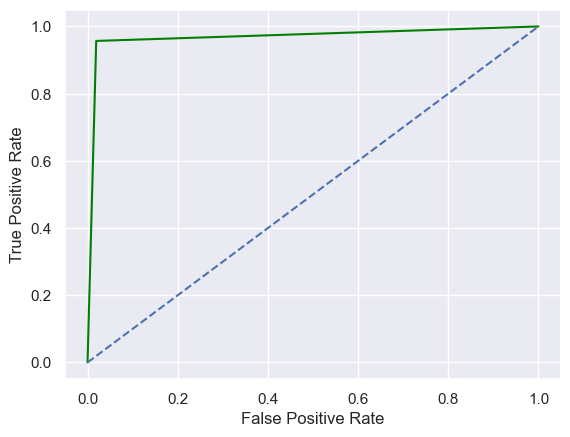

[[102   2]
 [  5 111]]


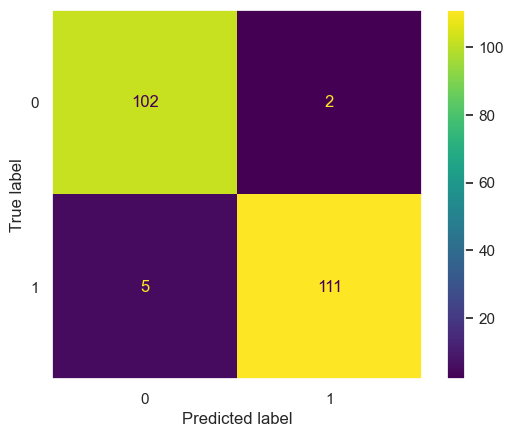

Happy Gilmore (1996)
Area under ROC curve: 0.8814655172413793
Beta: [[5.09740128]]


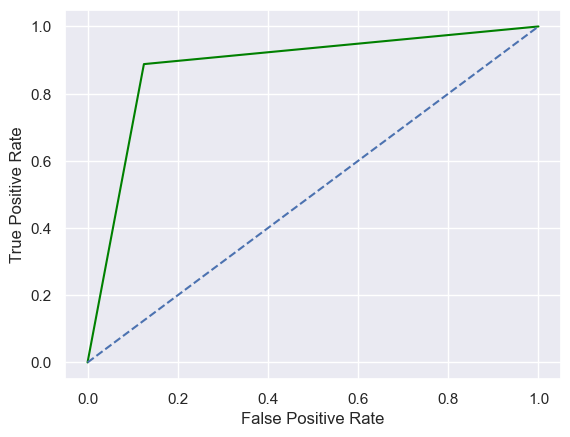

[[ 91  13]
 [ 13 103]]


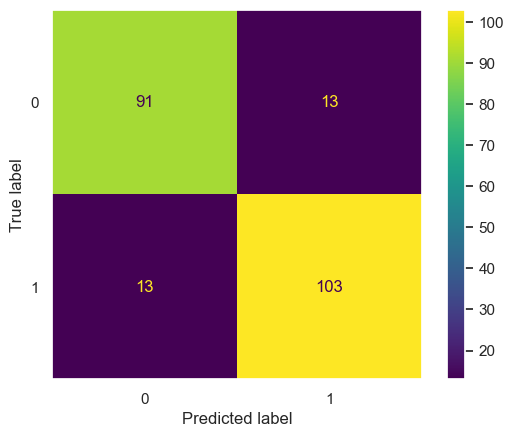

Diamonds are Forever (1971)
Area under ROC curve: 0.9545454545454546
Beta: [[6.74794836]]


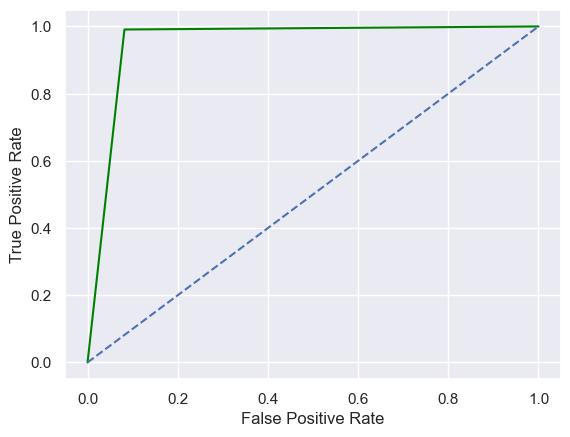

[[101   9]
 [  1 109]]


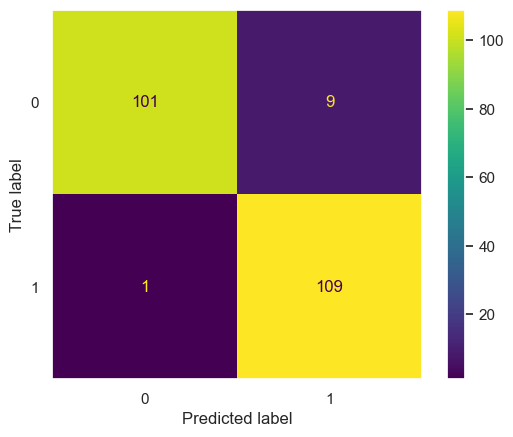

Scream (1996)
Area under ROC curve: 0.8723474801061009
Beta: [[4.24519817]]


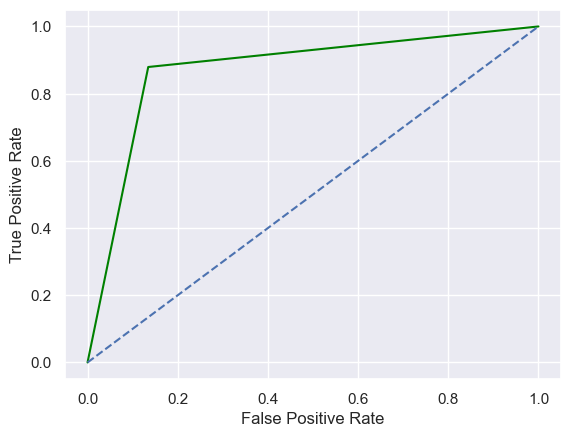

[[ 90  14]
 [ 14 102]]


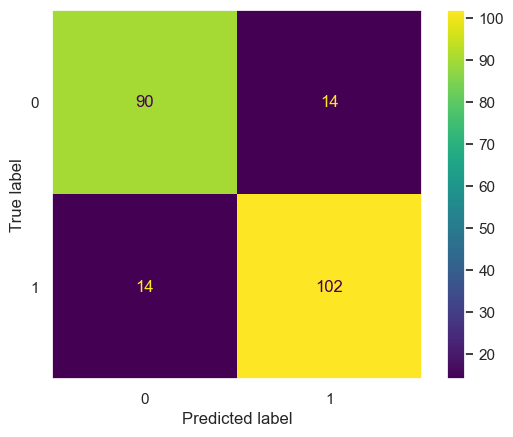

In [65]:
#Logistic Regression for 4 movies:
for i in range(4):
    X = average_rating_per_user.reshape(-1, 1) 
    Y = np.array(movie_sample_enjoyment[:,i]).reshape(-1, 1) 
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
    log_reg = LogisticRegression()
    log_reg.fit(x_train, y_train)
    y_pred =log_reg.predict(x_test)
    print(movie_sample_list[i])
#     print("Accuracy of the model is: %.3f" % accuracy_score(y_pred, y_test))

    # ROC Curve
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    print("Area under ROC curve:", metrics.auc(fpr, tpr))
    beta = log_reg.fit(x_train, y_train).coef_
    print("Beta:", beta)
    plt.plot(fpr, tpr, color = "green")
    plt.plot(fpr, fpr, linestyle='dashed')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    ## Confusion Matrix for the predicted outputs
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp=ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_reg.classes_)
    print(conf_matrix)
    disp.plot()
    plt.grid()
    plt.show()



## Extra Credit
Use machine learning methods of your choice to tell us something interesting and true about the movies in this dataset that is not already covered by the questions above [for an additional 5% of the grade score].

Question: Can sensation seeking behavior be a good estimate of 30 movies explored in Q3 & 4? (using lasso regression)

Columns 401-420: These columns contain self-assessments on sensation seeking behaviors (1-5)


In [222]:
data_df_bonus = data_df_impute
column_headers = data_df_bonus.columns.values.tolist()
sensation_seeking = column_headers[400:422]
data_df_bonus = data_df_bonus.dropna(axis=0, how='any', subset=sensation_seeking, inplace=False) #remove rows that are all NaN


# find row and column averages
average_rating_per_user = np.zeros(data_df_bonus.shape[0])
average_rating_per_question = np.zeros(22)
average_rating_per_user_question = np.zeros((data_df_bonus.shape[0],22))
columns = [400, 401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421]


for i in range(data_df_bonus.shape[0]):
    average_rating_per_user[i] = np.mean(data_df_bonus.iloc[i,400:421])
    
for j, col in enumerate(columns):
    average_rating_per_question[j] = np.mean(data_df_bonus.iloc[:,j])
    
for user in range(data_df_bonus.shape[0]):
    for question in range(21):
        average_rating_per_user_question[user,question] = (average_rating_per_user[user]+average_rating_per_question[question])/2

In [223]:
# impute averages in new df

columns = [400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421]
print(columns)

data_df_impute_bonus = data_df_bonus


for x in range(data_df_impute_bonus.shape[0]):
    for y, col in enumerate(columns):
        if np.isnan(data_df_bonus.iloc[x,y]):
            mean_val = average_rating_per_user_question[x,y]
            data_df_impute_bonus.iloc[x,y] = mean_val
            
            
data_df_impute_bonus.iloc[:,400:421]



[400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421]


,I enjoy driving fast,I enjoy rollercoasters,Have you ever bungee-jumped?,I enjoy impulse shopping,I sometimes go out on weeknights even if I have work to do,I enjoy doing things without too much planning,Have you ever been rock climbing?,I enjoy being in large loud crowds like the Times Square Ball Drop on New Years Eve,I enjoy going to large music or dance festivals,I enjoy watching horror movies,...,I like to be surprised even if it startles or scares me,Have you ever parachuted?,I enjoy haunted houses,I had a sheltered upbringing,My life is very stressful,I value my life to be well ordered and predictable,Have you ridden a motorcycle?,Have you gambled or bet for money?,Have you ever been sky-diving?,Is talkative
0,5.0,5.0,2.0,5.0,1.0,2.0,3.0,1.0,4.0,1.0,...,5.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,1.0,1.0
1,4.0,5.0,2.0,4.0,2.0,1.0,1.0,2.0,4.0,1.0,...,4.0,1.0,1.0,4.0,3.0,3.0,4.0,1.0,1.0,2.0
2,4.0,4.0,1.0,2.0,2.0,2.0,1.0,3.0,4.0,1.0,...,1.0,2.0,1.0,3.0,4.0,4.0,2.0,1.0,2.0,4.0
3,5.0,5.0,2.0,5.0,4.0,2.0,4.0,4.0,5.0,4.0,...,4.0,1.0,4.0,4.0,3.0,4.0,1.0,1.0,1.0,5.0
4,4.0,1.0,3.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,...,4.0,1.0,2.0,3.0,3.0,1.0,1.0,4.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2.0,4.0,2.0,5.0,2.0,1.0,3.0,2.0,5.0,1.0,...,3.0,2.0,1.0,4.0,4.0,4.0,1.0,1.0,2.0,4.0
1093,3.0,5.0,2.0,5.0,4.0,1.0,4.0,4.0,5.0,5.0,...,5.0,2.0,1.0,5.0,4.0,5.0,3.0,1.0,2.0,5.0
1094,4.0,5.0,2.0,2.0,3.0,1.0,4.0,1.0,4.0,1.0,...,2.0,2.0,1.0,4.0,4.0,5.0,2.0,3.0,2.0,4.0
1095,3.0,4.0,2.0,5.0,2.0,5.0,1.0,2.0,1.0,2.0,...,3.0,1.0,1.0,4.0,4.0,3.0,1.0,4.0,1.0,4.0


In [297]:
middle_movie_sample = data_df_impute_bonus.iloc[:,non_top_bottom_movies_index]

X = np.array(data_df_impute_bonus.iloc[:,400:421])
Y = np.array(middle_movie_sample)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 5)


print(middle_movie_sample.columns.values.tolist())
print(sensation_seeking)


['Gone in Sixty Seconds (2000)', 'Crossroads (2002)', 'Austin Powers: The Spy Who Shagged Me (1999)', 'Austin Powers in Goldmember (2002)', 'Goodfellas (1990)', 'The Big Lebowski (1998)', 'Twister (1996)', 'Blues Brothers 2000 (1998)', 'Dances with Wolves (1990)', '28 Days Later (2002)', 'Knight and Day (2010)', 'The Evil Dead (1981)', 'The Machinist (2004)', 'The Blue Lagoon (1980)', 'Uptown Girls (2003)', 'Men in Black II (2002)', 'Men in Black (1997)', 'The Green Mile (1999)', 'The Rock (1996)', "You're Next (2011)", 'The Poseidon Adventure (1972)', 'The Good the Bad and the Ugly (1966)', 'Let the Right One In (2008)', 'Equilibrium (2002)', 'Just Married (2003)', 'The Mummy Returns (2001)', 'The Mummy (1999)', 'Reservoir Dogs (1992)', 'Man on Fire (2004)', 'The Prestige (2006)']
['I enjoy driving fast', 'I enjoy rollercoasters ', 'Have you ever bungee-jumped?', 'I enjoy impulse shopping', 'I sometimes go out on weeknights even if I have work to do', 'I enjoy doing things without too

In [306]:
# Lasso Regression with Hyperparameter Tuning (one alpha for each of the 30 movies-old way)
alphas1=[2.0**c for c in np.arange(-8,1)]
alphas2 = np.linspace(0.01,.1,20)
alphas3 = np.linspace(1,200,200)
alphas = [*alphas1, *alphas2, *alphas3]
RMSE = np.zeros([30,len(alphas)])
optimal_alpha = np.zeros(30)
top_RMSE = np.zeros(30)

print('alphas tested:', alphas)

for i, movie in enumerate(middle_movie_sample):
    for x, alpha in enumerate(alphas):
        lasso_cv = LassoCV(alphas=alphas).fit(X_train, y_train[:,i])
        optimal_alpha[i] = lasso_cv.alpha_

for i, movie in enumerate(middle_movie_sample):
    lasso_reg = Lasso(alpha = optimal_alpha[i])
    lasso_reg.fit(X_train, y_train[:,i])
    y_pred = lasso_reg.predict(X_test)
    top_RMSE[i] = mean_squared_error(y_pred, y_test[:,i])
    print(middle_movie_sample.columns.values.tolist()[i],"Model Coef: ", lasso_reg.coef_)
    print(middle_movie_sample.columns.values.tolist()[i],",", optimal_alpha[i],",",top_RMSE[i])
print(top_RMSE)

alphas tested: [0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 0.01, 0.01473684210526316, 0.019473684210526317, 0.024210526315789474, 0.02894736842105263, 0.03368421052631579, 0.03842105263157895, 0.04315789473684211, 0.04789473684210527, 0.052631578947368425, 0.05736842105263158, 0.06210526315789474, 0.0668421052631579, 0.07157894736842106, 0.07631578947368421, 0.08105263157894736, 0.08578947368421053, 0.09052631578947369, 0.09526315789473684, 0.1, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 8